In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn


import torch.optim as optim

import sys
sys.path.insert(0, '../libraries/')

import mnist_data_utils 
import mnist_vae_lib

import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Load data

In [2]:
data_dir = '../mnist_data/'
propn_sample = 0.05

In [3]:
train_set, test_set = mnist_data_utils.get_mnist_dataset(data_dir, propn_sample)

In [4]:
batchsize = 12

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batchsize,
                 shuffle=True)

test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batchsize,
                shuffle=False)


In [5]:
for batch_idx, d in enumerate(train_loader):
    data_train = d
    break
    
for batch_idx, d in enumerate(test_loader):
    data_test = d
    break

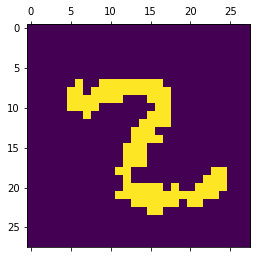

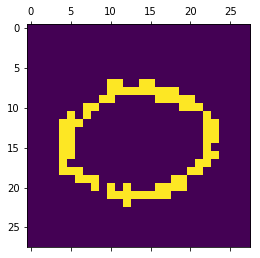

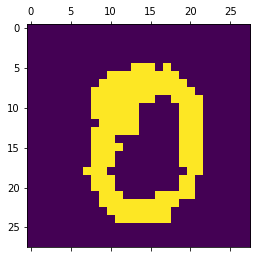

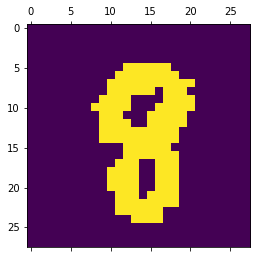

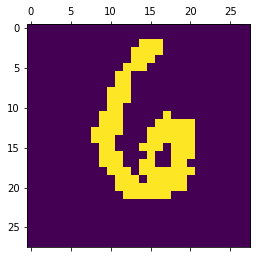

In [6]:
for i in range(5): 
    plt.matshow(data_train['image'][i, 0, :, :])

# Define VAE

In [7]:
vae = mnist_vae_lib.HandwritingVAE()

In [8]:
vae.parameters

<bound method Module.parameters of HandwritingVAE(
  (encoder): MLPEncoder(
    (fc1): Linear(in_features=784, out_features=256, bias=True)
    (fc2): Linear(in_features=256, out_features=10, bias=True)
    (tanh): Tanh()
  )
  (decoder): MLPDecoder(
    (fc1): Linear(in_features=5, out_features=256, bias=True)
    (fc2): Linear(in_features=256, out_features=784, bias=True)
    (sigmoid): Sigmoid()
    (tanh): Tanh()
  )
)>

In [9]:
recon_mean, latent_mean, latent_log_std, latent_params = vae.forward(data_train['image'])

In [10]:
loss = vae.get_loss(data_train['image'])
print(loss)

tensor([ 553.8182,  547.7400,  552.3335,  552.0435,  551.1285,  551.7347,
         553.0646,  542.4996,  544.2333,  549.6103,  552.7297,  548.0926])


# Check training goes through

In [11]:
weight_decay = 1e-6
lr = 0.001

optimizer = optim.Adam([
                {'params': vae.parameters(),
                'lr': lr,
                'weight_decay': weight_decay}])

In [12]:
mnist_vae_lib.train_vae(vae, train_loader, test_loader, optimizer,
                outfile = './test',
                n_epoch = 5, print_every = 2, save_every = 2)

AttributeError: module 'mnist_vae_lib' has no attribute 'train_vae'